# Predicción Meteorológica: Análisis de Patrones de Lluvia con Técnicas de Minería de Datos

# Prueba 1

### I) Diagrama de Arquitectura en la Nube para Minería de Datos

### 1. Obtención de Datos
- Para cargar y almacenar los datos crudos (sin procesar)

### 2. Preparación y Limpieza
- Herramientas para limpiar y transformar datos

### 3. Modelado
- Crear y entrenar modelos predictivos

### 4. Almacenamiento de Resultados
- Bases de datos optimizadas para análisis o archivos

### 5. Visualización
- Dashboards interactivos

### 6. Monitoreo y Automatización
- Monitoreo ante caídas


# -------------------------

## II) Desarrollo Notebook

### 1. Carga y visualización inicial de los datos
- ¿Cómo cargarías el dataset en un DataFrame de Pandas y mostrarías las primeras 5 filas?




In [16]:
# Importar las bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [17]:
# 1. Carga y visualización inicial
# Leer el archivo parquet
df = pd.read_parquet('weatherAUS.parquet')


In [18]:
# Mostrar las primeras 5 filas
print("Primeras 5 filas del dataset:")
display(df.head())

Primeras 5 filas del dataset:


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


### 2. Revisión de valores faltantes
- ¿Cuáles columnas tienen valores faltantes y qué porcentaje de datos falta en cada una de ellas?



In [19]:
# Calcular porcentaje de valores faltantes
valores_faltantes = (df.isnull().sum() / len(df)) * 100
print("\nPorcentaje de valores faltantes en cada columna:")
display(valores_faltantes)


Porcentaje de valores faltantes en cada columna:


Date              0.000000
Location          0.000000
MinTemp           0.447983
MaxTemp           0.226453
Rainfall          0.988797
Evaporation      42.789026
Sunshine         47.692924
WindGustDir       6.561504
WindGustSpeed     6.519308
WindDir9am        7.041838
WindDir3pm        2.656952
WindSpeed9am      0.948007
WindSpeed3pm      1.849599
Humidity9am       1.247600
Humidity3pm       2.538803
Pressure9am       9.855619
Pressure3pm       9.832411
Cloud9am         37.735332
Cloud3pm         40.152469
Temp9am           0.635756
Temp3pm           1.917113
RainToday         0.988797
RISK_MM           0.000000
RainTomorrow      0.000000
dtype: float64

### 3. Distribución de valores
- ¿Cuál es la distribución estadística de las variables numéricas como MinTemp, MaxTemp, y RISK_MM?


In [20]:
# Resumen estadístico de variables numéricas
print("\nDistribución estadística de variables clave:")
display(df[['MinTemp', 'MaxTemp', 'RISK_MM']].describe())


Distribución estadística de variables clave:


,MinTemp,MaxTemp,RISK_MM
count,141556.000000,141871.000000,142193.000000
mean,12.186400,23.226784,2.360682
std,6.403283,7.117618,8.477969
min,-8.500000,-4.800000,0.000000
25%,7.600000,17.900000,0.000000
50%,12.000000,22.600000,0.000000
75%,16.800000,28.200000,0.800000
max,33.900000,48.100000,371.000000


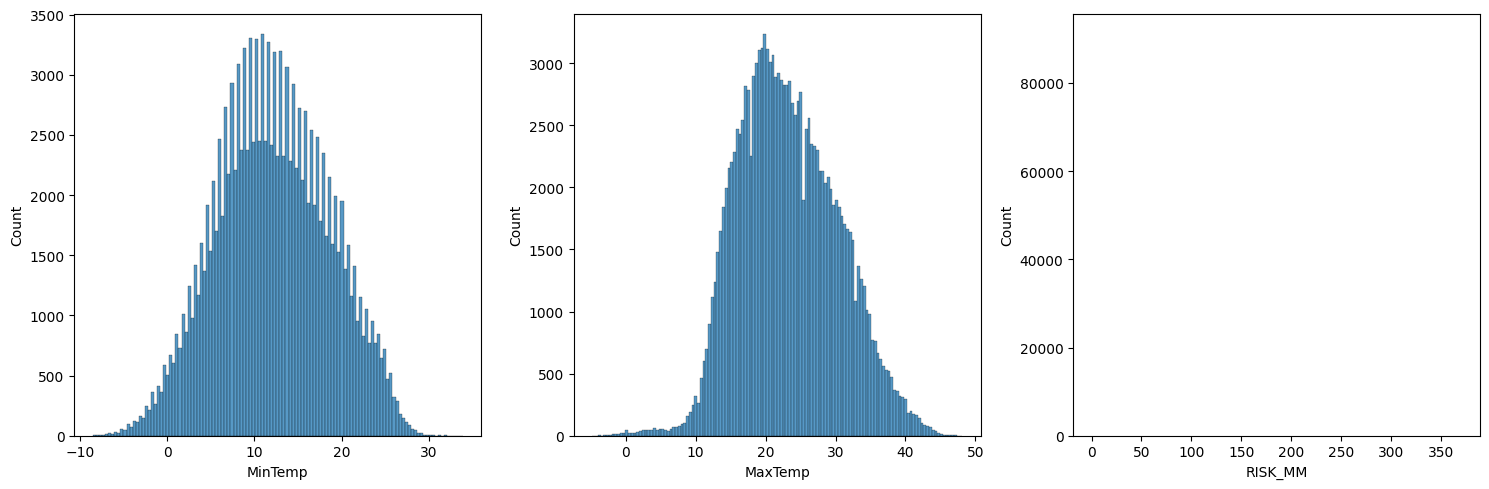

In [21]:
# Crear gráficos de distribución
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(data=df, x='MinTemp', ax=axes[0])
sns.histplot(data=df, x='MaxTemp', ax=axes[1])
sns.histplot(data=df, x='RISK_MM', ax=axes[2])
plt.tight_layout()
plt.show()

### 4. Limpieza de datos
- ¿Cómo manejarías los valores faltantes en el dataset para garantizar que no afecten el análisis?



In [22]:
# 4. Limpieza de datos
# Manejar valores faltantes
df_limpio = df.copy()
# Rellenar columnas numéricas con la mediana
columnas_numericas = df.select_dtypes(include=['float64', 'int64']).columns
df_limpio[columnas_numericas] = df_limpio[columnas_numericas].fillna(df_limpio[columnas_numericas].median())
# Rellenar columnas categóricas con la moda
columnas_categoricas = df.select_dtypes(include=['object']).columns
df_limpio[columnas_categoricas] = df_limpio[columnas_categoricas].fillna(df_limpio[columnas_categoricas].mode().iloc[0])


### 5. Conversión de tipos de datos
- ¿Es necesario convertir alguna columna a otro tipo de dato?
- Por ejemplo, convertir la columna Fecha a un formato de fecha

In [23]:
# 5. Conversión de tipos de datos
# Convertir columna Date a datetime
df_limpio['Date'] = pd.to_datetime(df_limpio['Date'])


# --------------------------

## III) Visualización de Datos

### 6. Análisis de temperatura
- ¿Cómo puedes graficar la relación entre MinTemp y MaxTemp? (ejemplo, usa matplotlib)


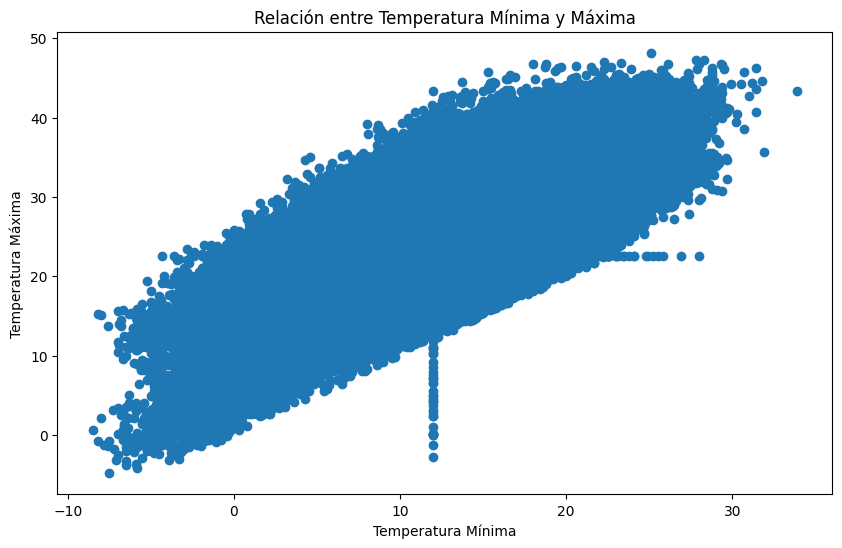

In [24]:
# 6. Análisis de temperatura
plt.figure(figsize=(10, 6))
plt.scatter(df_limpio['MinTemp'], df_limpio['MaxTemp'])
plt.xlabel('Temperatura Mínima')
plt.ylabel('Temperatura Máxima')
plt.title('Relación entre Temperatura Mínima y Máxima')
plt.show()

### 7. Mapa de calor
- ¿Qué variables tienen mayor correlación con RISK_MM según un mapa de calor? (ejemplo, usa seaborn)


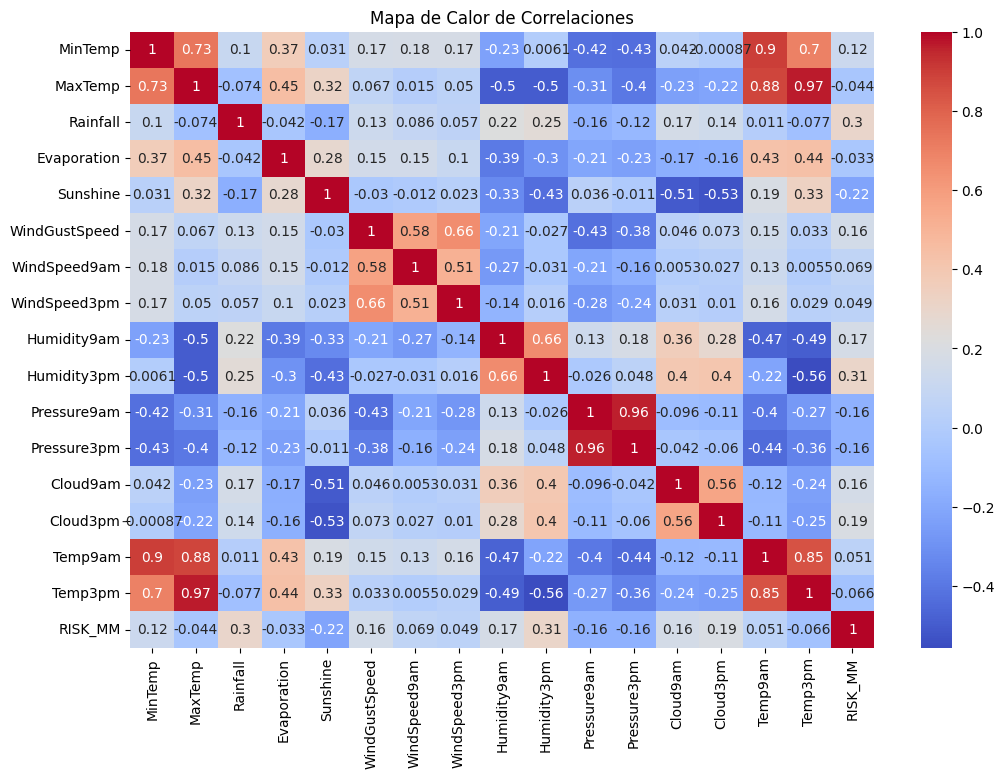

In [25]:
# 7. Mapa de calor
# Seleccionar columnas numéricas para correlación
columnas_numericas = df_limpio.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(12, 8))
sns.heatmap(df_limpio[columnas_numericas].corr(), annot=True, cmap='coolwarm')
plt.title('Mapa de Calor de Correlaciones')
plt.show()

## IV) Preguntas

### Pregunta 1. Objetivos CRISP-DM
- ¿Cuáles son los objetivos principales que se desean alcanzar al analizar el dataset meteorológico usando el enfoque CRISP-DM?



## Respuesta
### Objetivos CRISP-DM para Análisis Meteorológico

### 1. Entendimiento del Negocio

#### Objetivos Principales:
- Predicción de probabilidad de lluvia para el día siguiente
- Identificación de patrones climáticos significativos
- Comprensión de relaciones entre variables meteorológicas

### 2. Entendimiento de los Datos

#### Análisis Inicial:
- Análisis de calidad y completitud de datos meteorológicos
- Identificación de variables clave para predicción de lluvia

### 3. Preparación de los Datos

#### Tareas de Preparación:
- Tratamiento de valores faltantes
- Conversión apropiada de tipos de datos
- Normalización de variables numéricas cuando sea necesario

### 4. Modelado

#### Desarrollo y Validación:
- Desarrollo de modelos predictivos para lluvia
- Validación de precisión en predicciones


## Pregunta 2. Beneficios Cloud Computing
- ¿Cómo podría beneficiarse un proyecto de minería de datos como este del uso de plataformas de Cloud Computing como AWS, Google Cloud o Azure?

### Respuesta: Beneficios del Cloud Computing en Análisis Meteorológico

### 1. Escalabilidad
- Procesamiento de grandes volúmenes de datos meteorológicos
- Capacidad de ajuste de recursos según demanda

### 2. Almacenamiento
- Almacenamiento seguro y redundante de históricos
- Acceso a datos desde cualquier ubicación

### 3. Servicios Especializados
- Uso de servicios de ML como Amazon SageMaker o Google AI Platform
- Herramientas de visualización en la nube

### 4. Automatización
- Pipelines automatizados para procesamiento de datos
- Actualización continua de modelos predictivos
